#### Building a model for Predicting Fraudulent Transactions for a financial company. 

#### 1. Importing Libraries 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression 
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,roc_curve,classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

#### 2. Reading Data

In [2]:
df=pd.read_csv(r'C:\Users\Amit\Downloads\Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#### 3. Data Info 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


##### 4.  Removing unneccessary features  

In [6]:
# we have removed these features because step, nameorig, namedest does not contribute in predicting fraudlent cases.
df =  df.drop(['step','nameOrig', 'nameDest'], axis = 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   isFlaggedFraud  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 388.3+ MB


#### 5. Converting categorical to numerical 

In [9]:
#we can see that the 'type' columns is categorical. Now, converting it into numerical.

df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [10]:
data = { "CASH_OUT":0,
            "PAYMENT":1,
            "CASH_IN":2,
            "TRANSFER":3,
            "DEBIT":4,}

# replacing 'type' columns with new data
df['type'] = df['type'].map(data)

#### 6. Missing values 

In [11]:
df.isna().sum()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There is no missing values in the dataset.

#### 7. Outliers 

type                 AxesSubplot(0.125,0.657941;0.227941x0.222059)
amount            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
oldbalanceOrg     AxesSubplot(0.672059,0.657941;0.227941x0.222059)
newbalanceOrig       AxesSubplot(0.125,0.391471;0.227941x0.222059)
oldbalanceDest    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
newbalanceDest    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
isFraud                 AxesSubplot(0.125,0.125;0.227941x0.222059)
isFlaggedFraud       AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

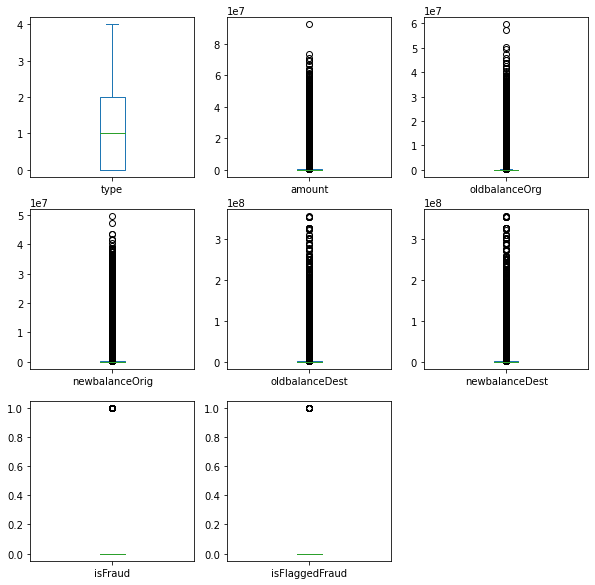

In [12]:
df.plot(kind="box",subplots=True, layout=(3,3),figsize=(10,10))

In [13]:
# handling outliers

def remove_outliers(df,col):
    lower_quantile = df[col].quantile(0.25)
    upper_quantile = df[col].quantile(0.75)
    IQR = upper_quantile - lower_quantile
    lower_whisker = lower_quantile - 1.5 * IQR
    upper_whisker = upper_quantile + 1.5 * IQR
    temp = df.loc[(df[col]>lower_whisker)&(df[col]<upper_whisker)]
    return temp[col]

In [14]:
df['amount'] = remove_outliers(df,'amount')
df['oldbalanceOrg'] = remove_outliers(df,'oldbalanceOrg')
df['newbalanceOrig'] = remove_outliers(df,'newbalanceOrig')
df['oldbalanceDest'] = remove_outliers(df,'oldbalanceDest')
df['newbalanceDest'] = remove_outliers(df,'newbalanceDest')

#### 8. Checking Cooreleation 

<AxesSubplot:>

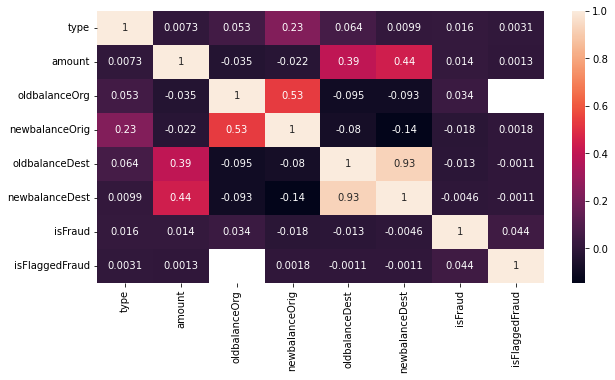

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [16]:
fraud_count = df['isFraud'].value_counts()
fraud_count

0    6354407
1       8213
Name: isFraud, dtype: int64

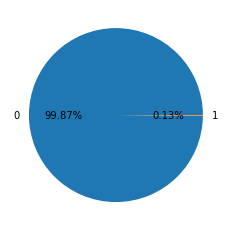

In [17]:
plt.pie(fraud_count,labels=fraud_count.keys(),autopct='%.2f%%');

the above graph shows 0.13% fraud transaction

Here, We can see that the target column is highly imbalanced. For handling the imabalanced dataset we need to use the SMOTE technique.

In [18]:
cols = list(df.columns)
cols

['type',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

#### 9. Feature Scaling 

In [19]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=cols)
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0.25,0.019612,0.634155,0.444471,0.000000,0.0,0.0,0.0
1,0.25,0.003716,0.079202,0.053750,0.000000,0.0,0.0,0.0
2,0.75,0.000361,0.000675,0.000000,0.000000,0.0,1.0,0.0
3,0.00,0.000361,0.000675,0.000000,0.008985,0.0,1.0,0.0
4,0.25,0.023256,0.154886,0.082868,0.000000,0.0,0.0,0.0


#### 10. Dividing dataset into x and y

In [20]:
x  = df.drop('isFraud', axis='columns')  #features columns
y = df['isFraud']                        #target column

#### 11. column_transformations to convert all columns into numerical form 

In [21]:
#Applying LabelEncoder to encode the target column

encode = preprocessing.LabelEncoder()   #making an obj of LabelEncoder()
df['isFraud'] = encode.fit_transform(df['isFraud'])  #applying LabelEncoding through fit_transform

In [22]:
#Column Transformation (Categorical to Numerical)

transformer1 = ColumnTransformer(transformers=[
    ('trs1',OneHotEncoder(),['type','amount',"oldbalanceOrg","newbalanceOrig", "oldbalanceDest", "newbalanceDest","isFlaggedFraud"])
],remainder='passthrough')
transformer1

ColumnTransformer(remainder='passthrough',
                  transformers=[('trs1', OneHotEncoder(),
                                 ['type', 'amount', 'oldbalanceOrg',
                                  'newbalanceOrig', 'oldbalanceDest',
                                  'newbalanceDest', 'isFlaggedFraud'])])

In [23]:
x = transformer1.fit_transform(x)

#### 11.  Applying SMOTE technique to handle imabalanced data 

In [24]:
over_sample = SMOTE(random_state=0)
x,y = over_sample.fit_resample(x,y)

y.value_counts()

0.0    6354407
1.0    6354407
Name: isFraud, dtype: int64

In [25]:
x.shape

(12708814, 13104315)

In [26]:
y.shape

(12708814,)

Now the data is balanced

#### 12. Splitting Dataset into train and test 

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

#### 13.  Model Building 

##### 1. Logistic Regression 

In [28]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [29]:
y_pred = lr_model.predict(x_test)
print('ROC AUC Score:',roc_auc_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))
print('Accuracy Score:',accuracy_score(y_test,y_pred))

ROC AUC Score: 0.9987939587537041
F1 Score: 0.9987949723700449
Confusion Matrix:
 [[1268060    3044]
 [     22 1270637]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1271104
         1.0       1.00      1.00      1.00   1270659

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763

Accuracy Score: 0.9987937506368612


#### Questions

###### 1. Data cleaning including missing values, outliers and multi-collinearity.

Dataset contains no missing values.

There are some features which has outliers so we handled the outliers.

###### 2. Describe your fraud detection model in elaboration. 

>Removing unneccesary columns ('step','nameOrig', 'nameDest') from the dataset because there is no much relation with the target column

>check for missing values and outliers handling outliers.

>Scaling the dataset.

>Applying SMOTE technique on target column for handling imabalanced dataset.

>Splitting dataset into train & test.

>Applying some ML algorithms for making a best model.

>Calulating their Accuracy, Precision, Recall, F1_Score and Confusion Matrix.

###### 3. How did you select variables to be included in the model? 

I dropped the unnecessary columns which are not gives any information for model building 

###### 4. Demonstrate the performance of the model by using best set of tools. 

I have provided various metrics like accuracy, precision, recall, f1_score and confusion matrix which are demonstrate the overall performance of the model.

###### 5. What are the key factors that predict fraudulent customer?

important key factors which predict the fraudulent customer are type', 'amount', 'oldbalanceorig, newbalanceOrig', 'oldbalanceDest', /'newbalanceDest', 'isFlaggedFraud'

###### 6. /Do these factors make sense? If yes, How? If not, How not?// 

Yes, Because these key factors hold the actual and sufficient information for any fraudulent transaction.